In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('./dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# featued enginerring

### Encoding

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [78]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [79]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [80]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [81]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

col_to_encod = ["fuel", "seller_type", "transmission", "owner"]

encoder = OrdinalEncoder(
    categories=[
        ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
        ['Individual', 'Dealer', 'Trustmark Dealer'],
        ['Manual', 'Automatic'],
        ['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car']
    ]
)

df[col_to_encod] = encoder.fit_transform(df[col_to_encod])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1.0,0.0,0.0,1.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   int64  
 3   km_driven      4340 non-null   int64  
 4   fuel           4340 non-null   float64
 5   seller_type    4340 non-null   float64
 6   transmission   4340 non-null   float64
 7   owner          4340 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 271.4+ KB


### Saprate dependent and independent variable

In [85]:
# dependent variable

x = df.iloc[:, [1] + list(range(3, 8))]
x.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0.0,0.0,0.0,0.0
1,2007,50000,0.0,0.0,0.0,0.0
2,2012,100000,1.0,0.0,0.0,0.0
3,2017,46000,0.0,0.0,0.0,0.0
4,2014,141000,1.0,0.0,0.0,1.0


In [86]:
y = df['selling_price']
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

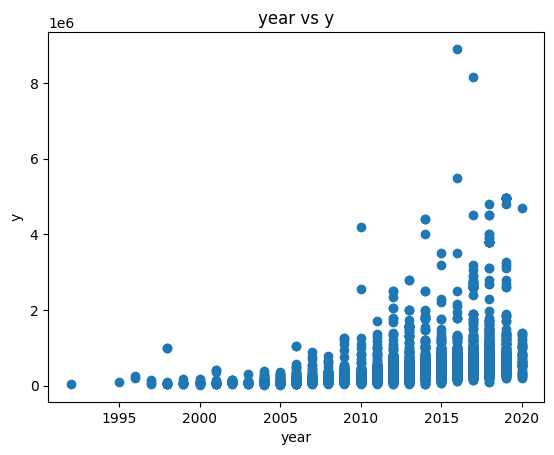

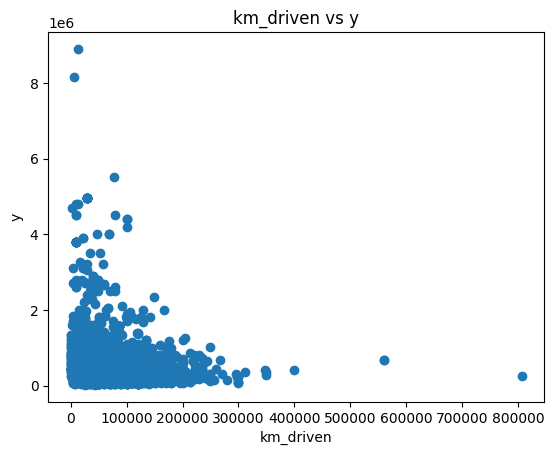

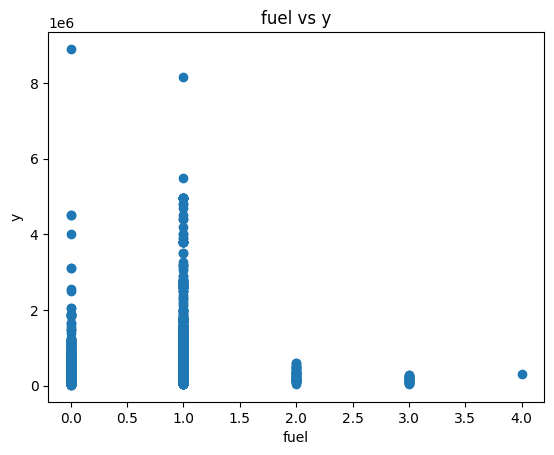

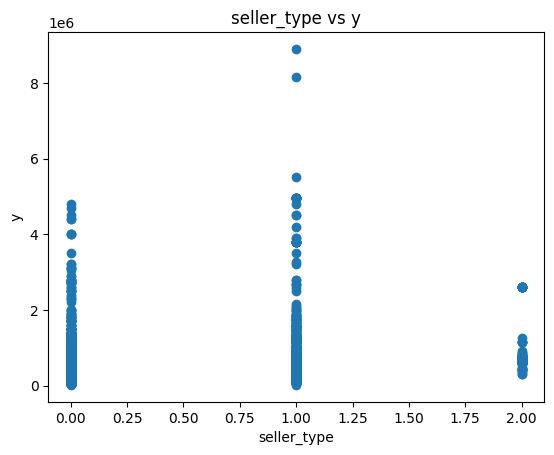

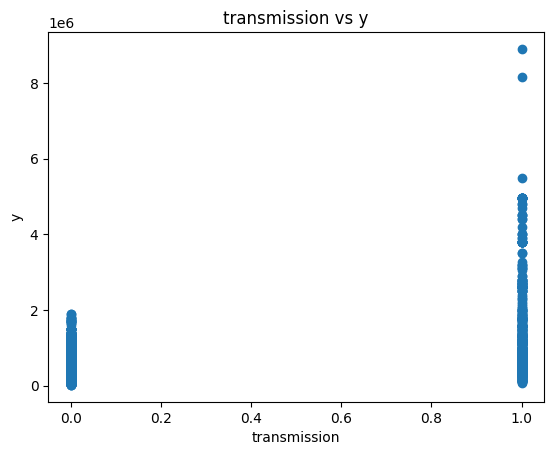

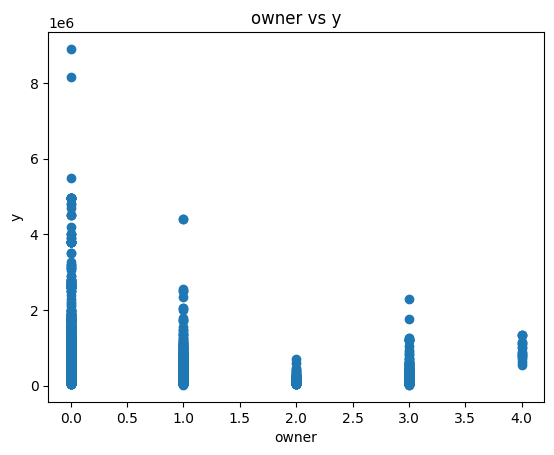

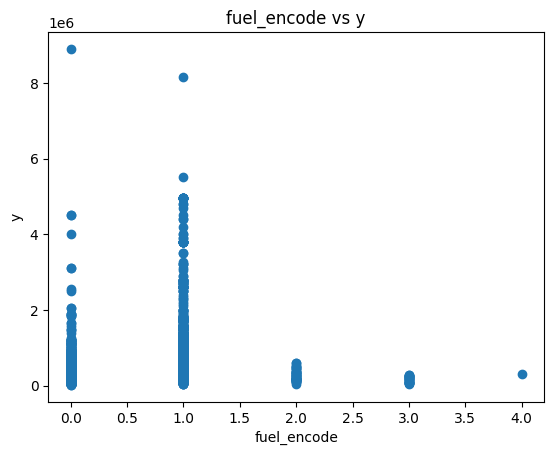

In [45]:
# import matplotlib.pyplot as plt

for col in x.columns:
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel("y")
    plt.title(f"{col} vs y")
    plt.show()


### Train test split

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(x_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
model.score(x_test, y_test)

0.5730568386751571

In [70]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, model.predict(x_test))
print("MAE:", mae)

MAE: 183762.33410041346


In [89]:
import pickle

# Save model
with open("pkl/car_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save encoder
with open("pkl/encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
